## Cancer Classifier using K-Nearest Neighbors


In [32]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

Load in the breast cancer data.


In [4]:
breast_cancer_data = load_breast_cancer()

### Data exploration - all the data points


In [9]:
breast_cancer_data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [10]:
breast_cancer_data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [11]:
breast_cancer_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [13]:
breast_cancer_data.target_names

array(['malignant', 'benign'], dtype='<U9')

### Data exploration - one data point.


In [8]:
breast_cancer_data.data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [16]:
breast_cancer_data.target[0]

0

In [18]:
breast_cancer_data.target_names[0]

'malignant'

### Splitting the data into training / validation sets


In [62]:
X_train, X_test, y_train, y_test = train_test_split(
    breast_cancer_data.data, breast_cancer_data.target, test_size=0.2, random_state=100
)

In [63]:
print("training data: ", len(X_train), "\ntraining labels: ", len(y_train))

training data:  455 
training labels:  455


### Running the classifier


In [64]:
classifier = KNeighborsClassifier(n_neighbors=3)

In [65]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Check it's performance with the test set:


In [66]:
classifier.score(X_test, y_test)

0.9473684210526315

94.7% is pretty good but is there a K that's even better?


In [67]:
scores = []

for i in range(99):

    classifier = KNeighborsClassifier(n_neighbors=i + 1)
    classifier.fit(X_train, y_train)

    scores.append(classifier.score(X_test, y_test))

In [59]:
scores

[0.9210526315789473,
 0.9298245614035088,
 0.9298245614035088,
 0.9385964912280702,
 0.9473684210526315,
 0.9385964912280702,
 0.9210526315789473,
 0.9298245614035088,
 0.9385964912280702,
 0.9385964912280702,
 0.9385964912280702,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9210526315789473,
 0.9210526315789473,
 0.9210526315789473,
 0.9210526315789473,
 0.9122807017543859,
 0.9122807017543859,
 0.9122807017543859,
 0.9122807017543859,
 0.9035087719298246,
 0.9210526315789473,
 0.9035087719298246,
 0.9210526315789473,
 0.9122807017543859,
 0.9210526315789473,
 0.9035087719298246,
 0.9122807017543859,
 0.9122807017543859,
 0.9122807017543859,
 0.9122807017543859,
 0.9122807017543859,
 0.9122807017543859,
 0.9210526315

In [68]:
print("highest accuracy is", max(scores))

highest accuracy is 0.9649122807017544


Visualizing output:

- x-axis = list of numbers to represent K (1 - 100)
- y-axis = validation accuracy (% value)


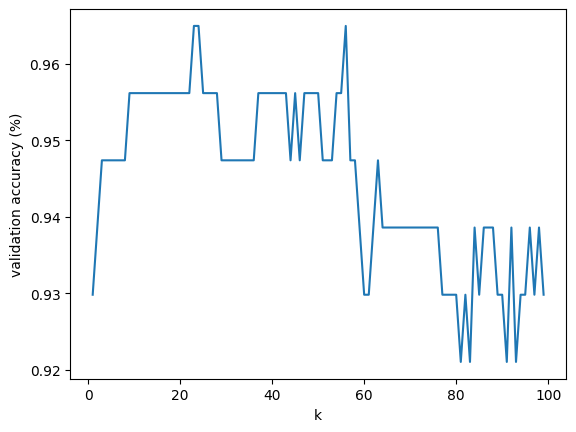

In [69]:
plt.plot(range(1, 100), scores)
plt.xlabel("k")
plt.ylabel("validation accuracy (%)")
plt.show()

This data set is fairly small, so there is slightly more variance in the accuracy than usual when shifting the 'random state' value.
